# Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – посчитать retention игроков (по дням от даты регистрации игрока).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import bootstrap
import pingouin

%matplotlib inline
from datetime import datetime
plt.rcParams['figure.figsize'] = (12, 10)

In [2]:
df_reg = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/shared/problem1-reg_data.csv', sep = ';')

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
df_reg.head() # Данные о регистрации в мобильной игре

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
df_reg.shape

(1000000, 2)

In [5]:
df_reg.uid.nunique() # Количество уникальных пользователей (как мы видим, совпадает с количеством строк в таблице регистраций)

1000000

In [6]:
df_reg.dtypes

reg_ts    int64
uid       int64
dtype: object

In [7]:
df_reg.reg_ts = pd.to_datetime(df_reg.reg_ts, unit = 's') # Переведем время в привычный нам вид

In [8]:
df_reg.head()

,reg_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,2000-01-13 22:27:27,3
3,2000-05-28 14:19:01,4
4,2000-09-16 11:21:53,5


In [9]:
df_reg.reg_ts.min() # Посмотрим когда случилась первая регистрация

Timestamp('1998-11-18 09:43:43')

In [10]:
df_reg.reg_ts.max()  # Посмотрим когда случилась крайняя регистрация

Timestamp('2020-09-23 15:17:24')

In [11]:
df_reg.duplicated().sum() # Проверим есть ли в этой таблице дубликаты

0

In [12]:
df_reg.isna().sum() # Проверим есть ли в таблице значения NaN

reg_ts    0
uid       0
dtype: int64

In [13]:
df_auth = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/shared/problem1-auth_data.csv', sep = ';')

In [14]:
df_auth.head() # Данные о времени захода пользователя в игру

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [15]:
df_auth.shape

(9601013, 2)

In [16]:
df_auth.uid.nunique()

1000000

In [17]:
df_auth.dtypes

auth_ts    int64
uid        int64
dtype: object

In [ ]:
df_auth.auth_ts = pd.to_datetime(df_auth.auth_ts, unit = 's') # Переведем время в привычный нам вид

In [ ]:
df_auth.head()

In [ ]:
df_auth.auth_ts.min() # Посмотрим когда случился первый вход в игру

In [ ]:
df_auth.auth_ts.max() # Посмотрим когда случился крайний вход в игру

In [ ]:
df = df_auth.merge(df_reg, on = 'uid') # Соединим имеющиеся у нас таблицы по id пользователя

Выведем дату регистарции и дату входа в игру отдельными столбцами

In [ ]:
df['auth_date'] = df['auth_ts'].dt.date
df['reg_date'] = df['reg_ts'].dt.date

Проверим, совпадает ли момент первого входа в игру с моментом регистрации игрока

In [ ]:
df.query('auth_ts == reg_ts').uid.nunique()

Получили результат, что у всех пользователей дата и время регистрации совпадают с временем первого входа в игру, согласно этого делаем вывод, что регистрация проходит в самой игре.
Отберем для дальнейшей работы в таблицу только id пользователя и даты входа и регистрации.

In [ ]:
df = df[['uid', 'auth_date', 'reg_date']]

In [ ]:
df.head()

Отберем только те записи в таблице, которые говорят о регистрации и первом входе в приложение, т.е. те записи, когда эти показатели равны

In [ ]:
df = df.query('auth_date == reg_date')

In [ ]:
df

Из вышеуказанного значит, что каждая строка в таких отобранных данных это один зарегистрированный игрок, введем новое значение

In [29]:
df['counts_reg'] = 1

Посчитаем накопительную сумму регистраций на каждую дату входа в приложение

In [30]:
df = df.groupby('auth_date').agg({'counts_reg' : 'sum'}).cumsum().reset_index()

Получаем ровно то, что ожидали увидеть, на крайний день активности в игре - зарегистрировались миллион человек

In [31]:
df

,auth_date,counts_reg
0,1998-11-18,1
1,1999-07-22,2
2,2000-01-13,3
3,2000-05-28,4
4,2000-09-16,5
...,...,...
5105,2020-09-19,994037
5106,2020-09-20,995673
5107,2020-09-21,997311
5108,2020-09-22,998952


Снова обратимся к первоначальной таблице с данными о входах в игру

In [32]:
df_auth

,auth_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,1999-07-25 16:46:46,2
3,1999-07-31 03:50:15,2
4,1999-08-05 17:49:39,2
...,...,...
9601008,2020-09-23 15:13:54,1110618
9601009,2020-09-23 15:14:46,1110619
9601010,2020-09-23 15:15:39,1110620
9601011,2020-09-23 15:16:31,1110621


Выведем отдельно дату входа в игру

In [33]:
df_auth['auth_date'] = df_auth['auth_ts'].dt.date

Посчитаем сколько уникальных пользователей в игре были в дни активности

In [34]:
df_auth = df_auth.groupby('auth_date', as_index = False).agg({'uid' : 'nunique'})

In [35]:
df_auth

,auth_date,uid
0,1998-11-18,1
1,1999-07-22,1
2,1999-07-25,1
3,1999-07-31,1
4,1999-08-05,1
...,...,...
6164,2020-09-19,15731
6165,2020-09-20,15829
6166,2020-09-21,15948
6167,2020-09-22,15755


Теперь соедним наши данные о регистрации пользователей и дни активности. 

Но мы получим дни активности, когда никто не регистрировался. Это означает, что кол-во зарегистрированных оставалось таким же как в предыдущий день где были регистрации.

In [36]:
df_active_day = df_auth.merge(df, on = 'auth_date', how = 'left').fillna(method = 'ffill')

In [37]:
df_active_day

,auth_date,uid,counts_reg
0,1998-11-18,1,1.0
1,1999-07-22,1,2.0
2,1999-07-25,1,2.0
3,1999-07-31,1,2.0
4,1999-08-05,1,2.0
...,...,...,...
6164,2020-09-19,15731,994037.0
6165,2020-09-20,15829,995673.0
6166,2020-09-21,15948,997311.0
6167,2020-09-22,15755,998952.0


In [38]:
df_active_day.isna().sum() # Убедимся, что нет пропущенных значений, так как мы об этом позаботились прошлым действием

auth_date     0
uid           0
counts_reg    0
dtype: int64

### Считаем показатель Retention для каждого активного дня в игре

In [39]:
df_active_day['Retention'] = round(100*df_active_day.uid / df_active_day.counts_reg,2)

In [40]:
df_active_day

,auth_date,uid,counts_reg,Retention
0,1998-11-18,1,1.0,100.00
1,1999-07-22,1,2.0,50.00
2,1999-07-25,1,2.0,50.00
3,1999-07-31,1,2.0,50.00
4,1999-08-05,1,2.0,50.00
...,...,...,...,...
6164,2020-09-19,15731,994037.0,1.58
6165,2020-09-20,15829,995673.0,1.59
6166,2020-09-21,15948,997311.0,1.60
6167,2020-09-22,15755,998952.0,1.58


#### Для наглядности посмотрим как изменялся показатель Retention 

In [41]:
df_active_day.auth_date = pd.to_datetime(df_active_day.auth_date)

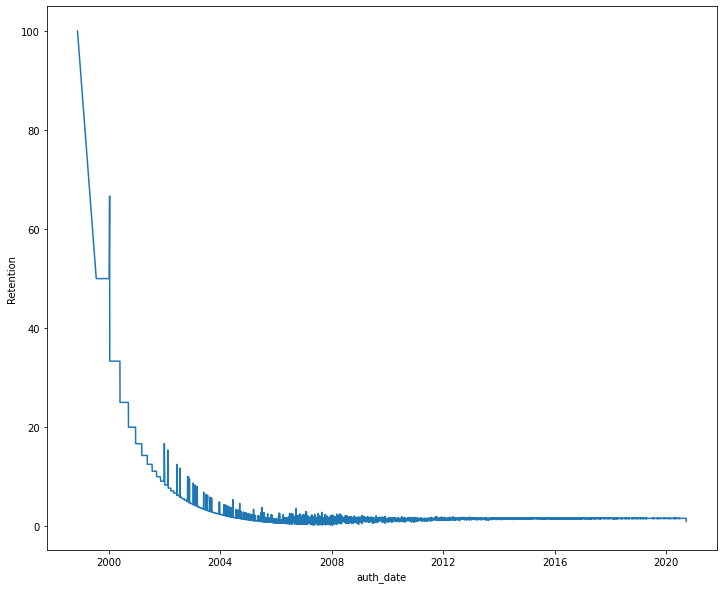

In [42]:
sns.lineplot(data = df_active_day, x = 'auth_date', y = 'Retention')

Из графика наглядно видим, что показатель Retention примерно первые 10 лет наблюдений стабильно снижался, видимо за счет первоначального увеличения новых пользователей.
Примерно с 2008 по крайнюю дату наблюдений Retention показывает стабильные значения.

В подтверждения нашего предположения посмотрим как на графике вели себя количество зарегистрированных пользователей, количество активных пользователей и показатель Retention.

Text(0.5, 1.0, 'Изменение количества зарегистрированных и активных игроков, и изменение Retention')

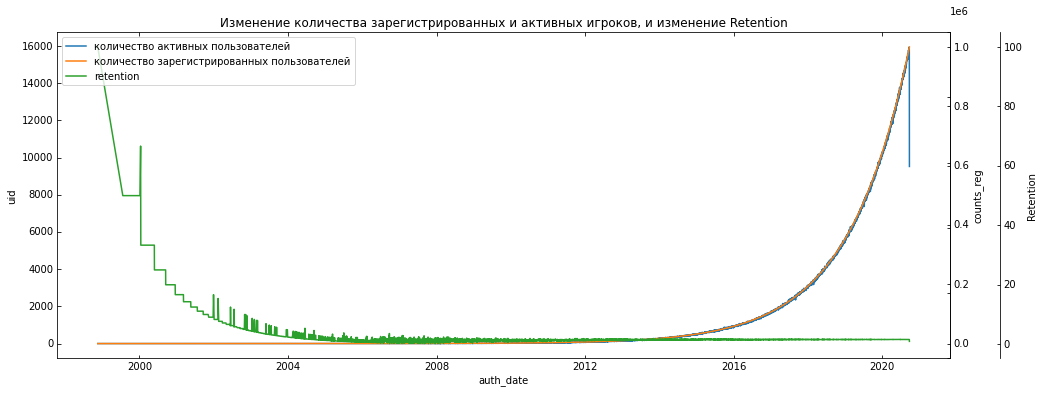

In [45]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

host = host_subplot(111, axes_class=axisartist.Axes) 
plt.rcParams["figure.figsize"] = (16, 6)
ax1 = host.twinx()
ax2 = host.twinx() 
ax3 = host.twinx()


ax1.axis["left"].toggle(all=True)
ax2.axis["right"].toggle(all=True) 
ax3.axis["right"] = ax3.new_fixed_axis(loc="right", offset=(50, 0))

sns.lineplot(data = df_active_day, x = 'auth_date', y = 'uid', ax = host, label = 'количество активных пользователей', legend = False, markers = True) 
sns.lineplot(data = df_active_day, x = 'auth_date', y = 'counts_reg', ax = ax2, label = 'количество зарегистрированных пользователей', legend = False) 
sns.lineplot(data = df_active_day, x = 'auth_date', y = 'Retention', ax = ax3, label = 'retention', legend = False) 
plt.legend()
plt.title('Изменение количества зарегистрированных и активных игроков, и изменение Retention')

Из данного графика мы видим, что Retention стабилизировался за счет взаимного роста количества регистраций и количество активностей. И только лишь в крайний день наблюдений мы имеем резкое понижение активности, то повлекло так же снижения Retention ( можем предположить, что в крайний день не полностью были записаны данные по активности, например из-за окончания наблюдений до конца суток, возможно и другие причины на анализ которых у нас недостаточно данных)

# Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений

In [43]:
df_ab = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/Final_Project_v1/final_project/Проект_1_Задание_2.csv', sep = ';')

In [44]:
df_ab

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [45]:
df_ab.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [47]:
df_ab.describe() # Сразу же видим, что по оплате присутствуют значительные выбросы

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


Посмотрим в какой именно группе были такие выбросы по оплате

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


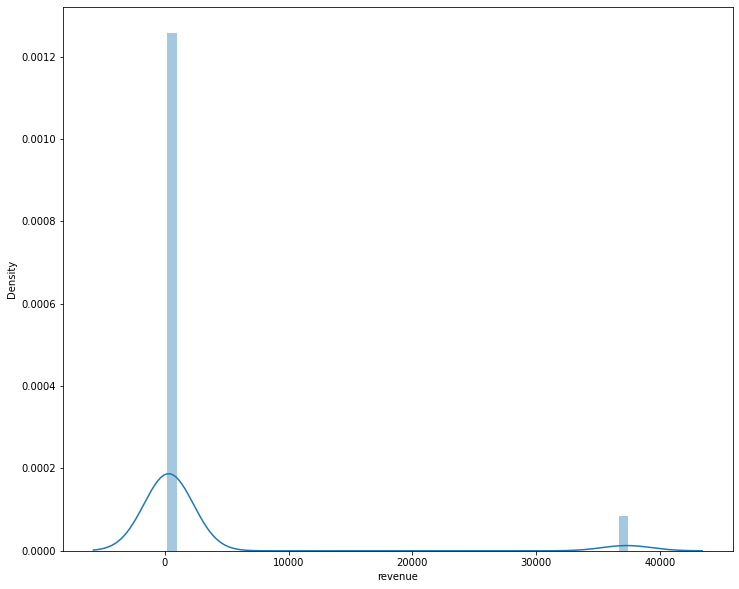

In [68]:
sns.distplot(df_ab.query("testgroup == 'a' and revenue > 0").revenue)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


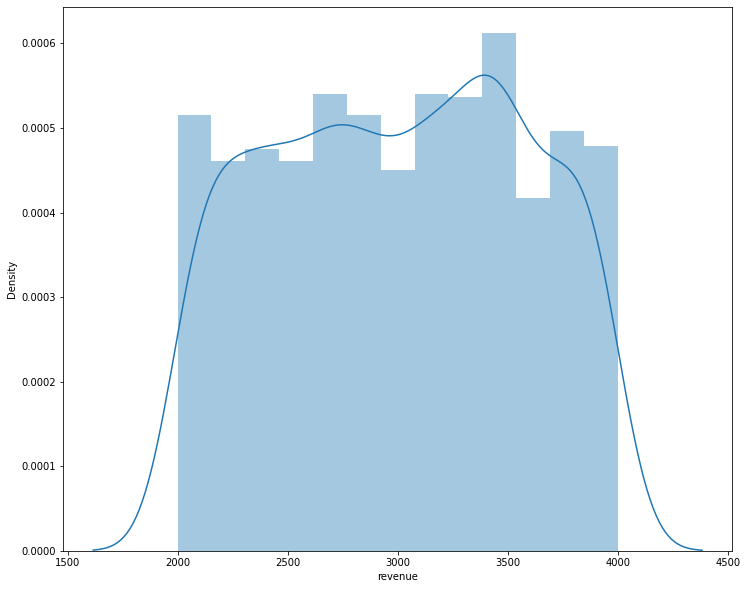

In [69]:
sns.distplot(df_ab.query("testgroup == 'b' and revenue > 0").revenue)

Видим, что именно в контрольной группе имеются выбросы.

In [48]:
df_ab.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [49]:
df_ab.duplicated().sum()

0

Проанализируем численность двух групп.
Видим, что они примерно равны

In [50]:
metric = df_ab.groupby('testgroup').agg({'user_id' : 'nunique'})
metric.columns = ['Count_users']
metric

,Count_users
testgroup,
a,202103
b,202667


Определим какие метрики необходимо проанализировать в данном A/B тесте 

In [51]:
metric['Count_paying_users'] = df_ab.query('revenue > 0').groupby('testgroup').agg({'user_id' : 'nunique'})
metric['Convertion_to_pay'] = round(100*metric.Count_paying_users / metric.Count_users,2)
metric['Profit'] = df_ab.groupby('testgroup').agg({'revenue' : 'sum'})
metric['ARPU'] = df_ab.groupby('testgroup').agg({'revenue' : 'mean'})
metric['ARPPU'] = df_ab.query('revenue > 0').groupby('testgroup').agg({'revenue' : 'mean'})
metric

,Count_users,Count_paying_users,Convertion_to_pay,Profit,ARPU,ARPPU
testgroup,,,,,,
a,202103,1928,0.95,5136189,25.413720,2663.998444
b,202667,1805,0.89,5421603,26.751287,3003.658172


Объединив интересующие нас метрики можем констатировать некоторые факты:
1. В тестовой группе меньшее количество платящих пользователей и соответственно показатель конверсии в покупку
2. Но в тестовой группе выше показатели ARPU и ARPPU, что сказывается на бОльшем значении в доходе компании

Проанализируем метрики более детально

## Посмотрим на первую метрику - количество платящих пользователей

In [52]:
df_users = metric[['Count_paying_users', 'Count_users']]
df_users['Count_not_paying'] = df_users.Count_users - df_users.Count_paying_users
df_users = df_users[['Count_paying_users', 'Count_not_paying']]
df_users

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Count_paying_users,Count_not_paying
testgroup,,
a,1928,200175
b,1805,200862


#### Исследуем показатель распределения платящих пользователей.
#### Сформулируем Н0: Распределение платящих и не платящих пользователей не зависит от группы.
#### Воспользуемся методом хи-квадрат Пирсона:

In [56]:
stats.chi2_contingency(df_users)

(4.374729521260405,
 0.03647561892312613,
 1,
 array([[  1863.89924896, 200239.10075104],
        [  1869.10075104, 200797.89924896]]))

#### Получив pvalue < 0.05 - можем отклонить H0, это означает, что распределение платящих пользователей зависит от группы. Что подтверждает первоначальное предположение о бОльшем количестве платящих пользователей в контрольной группе и конверсии в покупку соответственно.

## ARPU

#### Сформулируем H0 : Средний чек по пользователям равен в обеих группах
#### В данном исследовании наоборот нам необходимо учитывать всех пользователей (даже тех кто не стал клиентом), так как метрика ARPU подразумевает среднюю прибыль на всех пользователей
#### Воспользуемся критерием Манна-Уитни, т.к. он основывается именно на вычислении среднего значения чем и является ARPU, и получим p-value > 0.05, что не дает нам право отклонить нулевую гипотезу. 
#### Это означает, что средняя выручка на всех пользователей в группах не различается

In [53]:
stats.mannwhitneyu(df_ab.query("testgroup == 'a'").revenue, df_ab.query("testgroup == 'b'").revenue)

MannwhitneyuResult(statistic=20491259376.0, pvalue=0.06269701316074398)

## ARPPU

#### Сформулируем H0 : Средний чек по клиентам равен в обеих группах
#### В данном исследовании нам необходимо учитывать только платящих пользователей (клиентов), так как метрика ARPPU подразумевает среднюю прибыль на клиетов
#### Снова воспользуемся критерием Манна-Уитни и получим p-value < 0.05, что дает нам право отклонить нулевую гипотезу, это означает, что показатель ARPPU стат значимо больше в тестовой группе.

In [54]:
stats.mannwhitneyu(df_ab.query("testgroup == 'a' and revenue > 0").revenue, df_ab.query("testgroup == 'b' and revenue > 0").revenue)

MannwhitneyuResult(statistic=222015.0, pvalue=0.0)

## Изучив средние значения для прибыли, давайте посмотрим как изменилась медиана по прибыли для обеих групп.
### Для анализа восьмем только платящих пользователей

In [55]:
df_ab.query('revenue > 0').groupby('testgroup').agg({'revenue' : 'median'})

,revenue
testgroup,
a,311
b,3022


Видим, что медианное значение прибыли выросло почти в 10 раз в тестовой группе. Давайте проанализируем это изменение с помощью метода Bootstrap.

Н0: Медианы дохода в двух группах не отличаются

In [58]:
diff_medians = []
profit_A = df_ab.query("testgroup == 'a' and revenue > 0").revenue
profit_B = df_ab.query("testgroup == 'b' and revenue > 0").revenue

for i in range(10000):
    sample_A = profit_A.sample(frac=1, replace=True)
    sample_median_A = sample_A.median()
    
    sample_B = profit_B.sample(frac=1, replace=True)
    sample_median_B = sample_B.median()

    diff = sample_median_A - sample_median_B
    diff_medians.append(diff)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


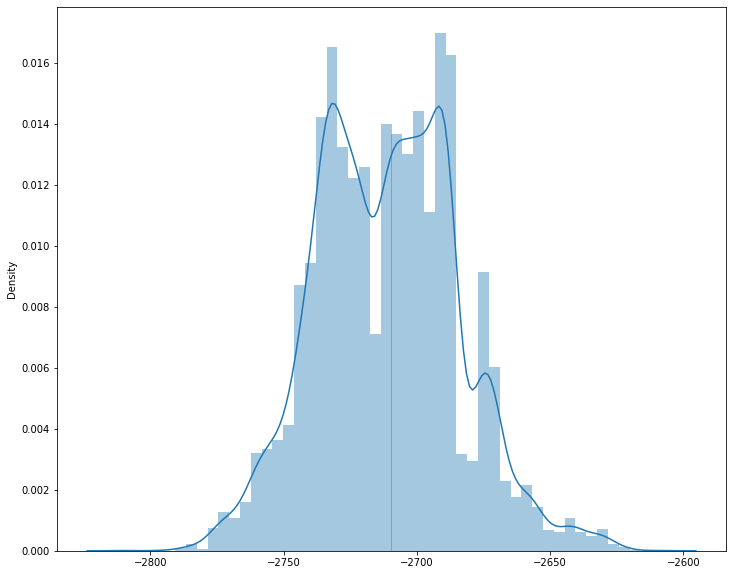

In [59]:
sns.distplot(diff_medians)

Построив распределние разности медиан мы имеем даже визуально отсутствия нуля в доверительном интервале, но тем не менее посчитаем его: 

In [60]:
pd.Series(diff_medians).quantile(0.025)

-2761.0

In [61]:
pd.Series(diff_medians).quantile(0.975)

-2657.0

Делаем вывод - мы получили результат, исходя из которого можем отклонить Н0, а это значит значительное увеличение медианы прибыли в тестовой группе

## Подведем итог

По итогу проведенного А/В теста и его анализа получаем следующие данные:
* в группе "а" стат. значимо большее число платящих пользователей;
* в группе "b" стат. значимо больше показатель ARPPU;
* анализ показателя ARPU у обеих групп не дал стат. значимого различия;
* в группе "b" стат. значимо больше значение медианы прибыли.


Резюмируя получившиеся итоги анализа можем сказать, что в тестовой группе мы получили значительный отток платящих пользователей.
Но за счёт значительного увеличения среднего чека клиентов (ARPPU) - повысилось и общая прибыль в тестовой группе по сравнению с контрольной. Так же в тестовой группе значительно больше медиана прибыли (Еще в начале исследования отмечалось наличия выбросов, которые сильно сместили значение средней прибыли в контрольной группе, что не влияет на медиану).

Можем сделать вывод: Набор акционных предложений тестируемый в группе "b" дал значительный прирост в прибыли компании и среднего чека покупателей.
Имеем все основания считать лучшим набор акционных преложений для тестовой группы.
В дальнейшем необходимо посмотреть как будет изменяться количество клиентов, а так же метрику конверсии в каждую последующую покупку, не забывая об отслеживании уже проанализированных метрик по прибыли. 

# Задание 3

#### В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

#### Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

Для первого события необходимо посмотреть:
1. Общее количество игроков принявших участие (для понимания интереса к событию среди игроков)
2. Коэффициент вовлеченности пользователей в событие
3. Среднее время участия игрока в событии(от общего времени за несколько сессий) (Для оценки вовлеченности игрока в событие)
4. ASL - средняя длина сессии
5. Среднее количество сессий в событие на пользователя
6. Средний достигнутый уровень
7. Среднее количество попыток прохождения каждого уровня (Для оценки сложности каждого уровня)
8. Относительная конверсия игроков от уровня к уровню


Для второго события:
1. Общее количество игроков принявших участие
2. Коэффициент вовлеченности пользователей в событие
3. Среднее время участия игрока в событии (от общего времени за несколько сессий) (Возможно с таким изменением среднее время значимо увеличится)
4. ASL (Имеется вероятность уменьшения при таких изменениях)
5. Среднее количество сессий в событие на пользователя
5. Средний достигнутый уровень (Имеется вероятность уменьшения при таких изменениях)
6. Среднее количество неудач на каждом уровне (Для оценки сложности каждого уровня)
7. Среднее количество попыток прохождения каждого уровня 



Подводя итог: 
* в усложненном событии нам станет интересна такая метрика как среднее количество неудач на каждом уровне;
* метрика отностельной конверсии от уровня к уровню будет затруднительно отслеживать, так как движение игроков по уровню станет реверсивным
